In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
# depth of this file in the project
file_depth = '../..'

In [3]:
with open(file_depth + '/config/data_1m_config.json') as config_file:
    config = json.load(config_file)

movies_data_path = config['original_csv_movies_data']
ratings_data_path = config['original_csv_ratings_data']
users_data_path = config['original_csv_users_data']

In [4]:
movies = pd.read_csv(file_depth + movies_data_path)
movies

,movie_id,title,genres,movie_year
0,1,Toy Story (1995),Animation|ForChildren|Comedy,1995
1,2,Jumanji (1995),Adventure|ForChildren|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [5]:
users = pd.read_csv(file_depth + users_data_path)
users

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,1060


In [6]:
ratings = pd.read_csv(file_depth + ratings_data_path)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [7]:
def date_from_timestamp(ratings_data):
    ratings_data['date'] = pd.to_datetime(ratings_data['timestamp'], unit='s')
    ratings_data['formatted_date'] = ratings_data['date'].dt.normalize()

    ratings_data['month'] = ratings_data['date'].dt.month
    ratings_data['year'] = ratings_data['date'].dt.year

    ratings_data.drop(columns=['date'], inplace=True)
    ratings_data.rename(columns={'formatted_date': 'date'}, inplace=True)
    
    return ratings_data

In [8]:
ratings = date_from_timestamp(ratings)

monthly_ratings = ratings.groupby(['year', 'month']).agg(rating_count=('user_id', 'size'), unique_users=('user_id', 'nunique')).reset_index()

#### ALL OF THE RATINGS

In [9]:
monthly_ratings

,year,month,rating_count,unique_users
0,2000,4,11396,86
1,2000,5,67437,486
2,2000,6,54486,508
3,2000,7,90334,778
4,2000,8,182109,1310
5,2000,9,52421,576
6,2000,10,42294,500
7,2000,11,290793,2357
8,2000,12,113487,1241
9,2001,1,18004,543


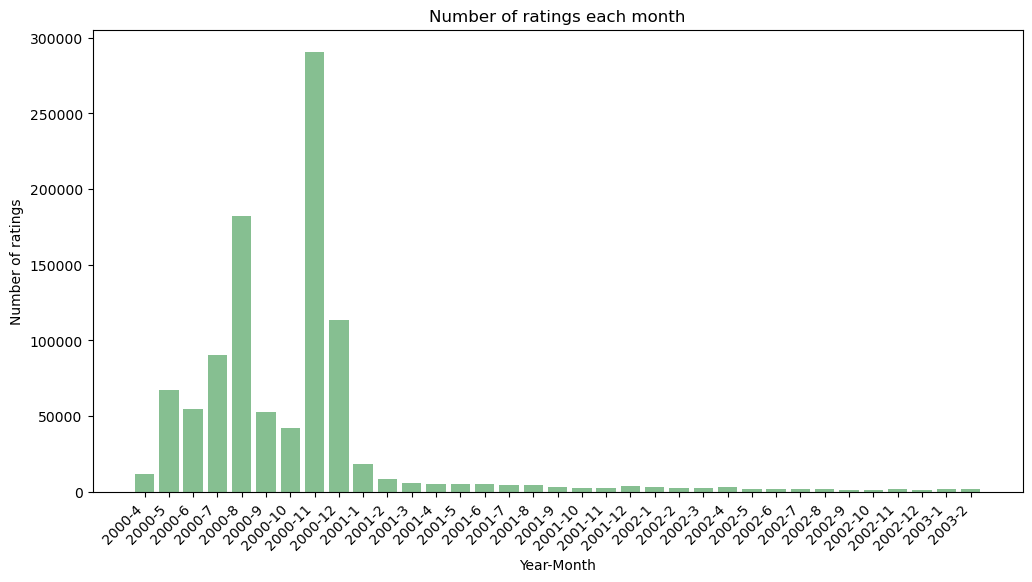

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_ratings['year'].astype(str) + '-' + monthly_ratings['month'].astype(str), monthly_ratings['rating_count'], color='#86bf91')
plt.title('Number of ratings each month')
plt.xlabel('Year-Month')
plt.ylabel('Number of ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

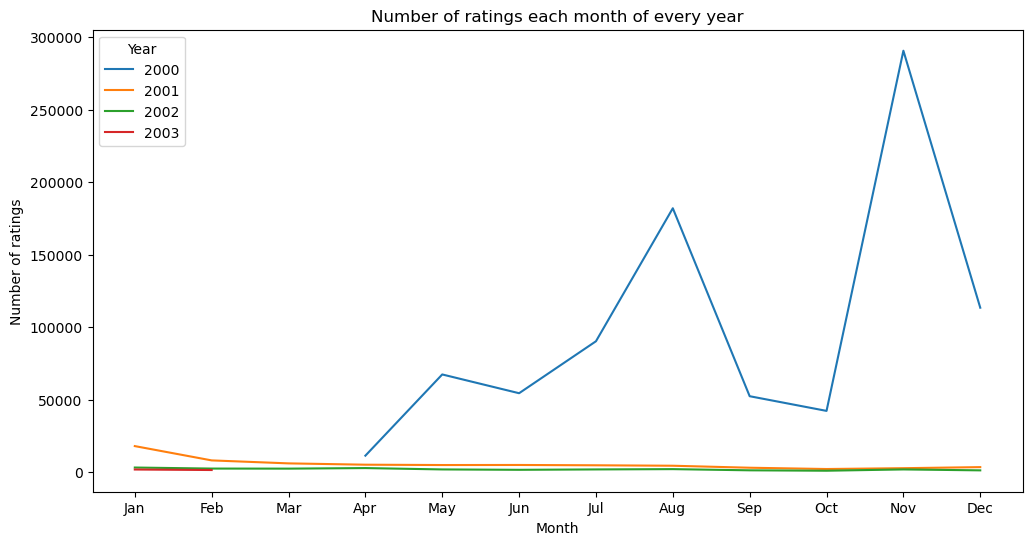

In [11]:

plt.figure(figsize=(12, 6))
for year in monthly_ratings['year'].unique():
    year_data = monthly_ratings[monthly_ratings['year'] == year]
    plt.plot(year_data['month'], year_data['rating_count'], label=str(year))

plt.title('Number of ratings each month of every year')
plt.xlabel('Month')
plt.ylabel('Number of ratings')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

-------

In [12]:
file_depth = '../..'

with open(file_depth + '/config/data_1m_config.json') as config_file:
    config = json.load(config_file)

movies_data_path = config['original_csv_movies_data']
ratings_data_path = config['original_csv_ratings_data']
users_data_path = config['original_csv_users_data']

movies = pd.read_csv(file_depth + movies_data_path)
ratings = pd.read_csv(file_depth + ratings_data_path)
users = pd.read_csv(file_depth + users_data_path)

# get all unique genres
unique_genres = movies['genres'].str.split('|', expand=True).stack().unique()

# ratings of 4 or 5
filtered_ratings = ratings[(ratings['rating'] == 4) | (ratings['rating'] == 5)]

final_ratings = filtered_ratings.merge(movies, on='movie_id', how='inner').drop(columns=['title', 'movie_year'])
final_ratings = date_from_timestamp(final_ratings)
final_ratings = final_ratings.drop(columns=['timestamp'])

grouped_data = final_ratings.groupby('user_id')

#### CUT MONTHLY RATINGS

In [13]:
monthly_cut_ratings = final_ratings.groupby(['year', 'month']).agg(rating_count=('user_id', 'size'), unique_users=('user_id', 'nunique')).reset_index()
monthly_cut_ratings

,year,month,rating_count,unique_users
0,2000,4,6263,86
1,2000,5,39852,486
2,2000,6,32658,506
3,2000,7,53570,769
4,2000,8,103372,1287
5,2000,9,30754,559
6,2000,10,24717,486
7,2000,11,166881,2334
8,2000,12,65298,1207
9,2001,1,10011,506


In [14]:
final_ratings

,user_id,movie_id,rating,genres,date,month,year
0,1,1193,5,Drama,2000-12-31,12,2000
1,2,1193,5,Drama,2000-12-31,12,2000
2,12,1193,4,Drama,2000-12-30,12,2000
3,15,1193,4,Drama,2000-12-30,12,2000
4,17,1193,5,Drama,2000-12-30,12,2000
...,...,...,...,...,...,...,...
575276,5851,3607,5,Comedy|Drama|Western,2000-05-08,5,2000
575277,5854,3026,4,Horror,2000-05-14,5,2000
575278,5938,2909,4,Documentary,2000-05-02,5,2000
575279,5948,1360,5,Drama,2002-03-19,3,2002


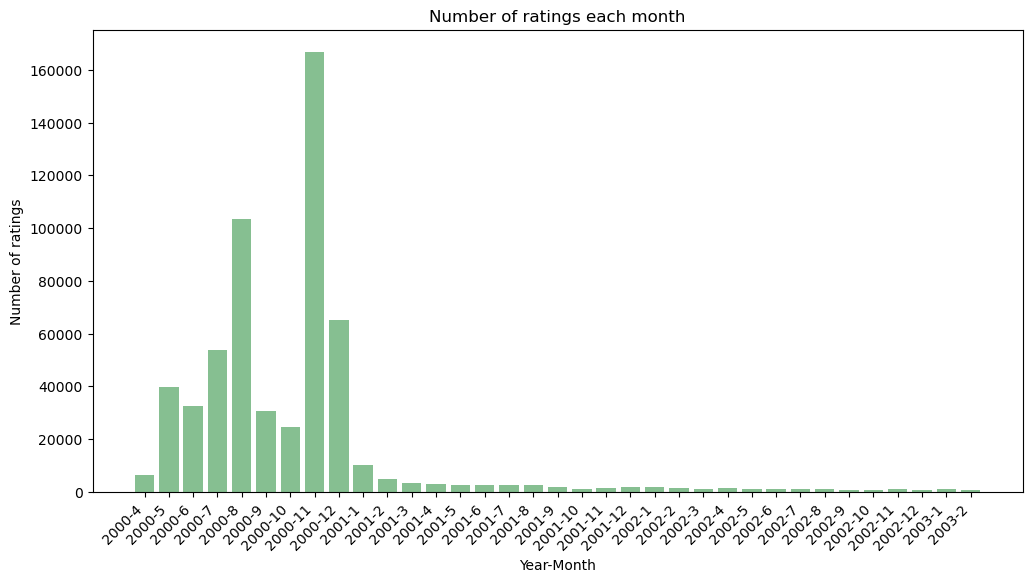

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_cut_ratings['year'].astype(str) + '-' + monthly_cut_ratings['month'].astype(str), monthly_cut_ratings['rating_count'], color='#86bf91')
plt.title('Number of ratings each month')
plt.xlabel('Year-Month')
plt.ylabel('Number of ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

--------

In [330]:
with open('rating_data_deviders/periods.json') as periods_file:
    periods = json.load(periods_file)

Devided ratings by months. Set the average to about 25k ratings per month, so we had to either merge or split some months. Merged months can already be seen in the periods.json file (start and end is more than 1 month apart) but months that needed to be split are have range of groups in the key value.

In [331]:
periods

{'01-02': {'start': '2000-04-01', 'end': '2000-05-31'},
 '03': {'start': '2000-06-01', 'end': '2000-06-30'},
 '04-05': {'start': '2000-07-01', 'end': '2000-07-31'},
 '06-09': {'start': '2000-08-01', 'end': '2000-08-31'},
 '10': {'start': '2000-09-01', 'end': '2000-09-30'},
 '11': {'start': '2000-10-01', 'end': '2000-10-31'},
 '12-17': {'start': '2000-11-01', 'end': '2000-11-30'},
 '18-19': {'start': '2000-12-01', 'end': '2000-12-31'},
 '20': {'start': '2001-01-01', 'end': '2001-06-30'},
 '21': {'start': '2001-07-01', 'end': '2003-02-28'}}

In [360]:
splits = []

for period in periods:

    start = periods[period]['start']
    end = periods[period]['end']
    # print(f"Period: {period}, start: {start}, end: {end}")
    filtered_by_ranges = final_ratings[final_ratings['date'].between(start, end)]

    if "-" in period and len(period.split("-")) == 2:
        range_start, range_end = map(int, period.split("-"))
        ranges = list(range(range_start, range_end + 1))

        n = len(ranges)
        total_rows = len(filtered_by_ranges)

        for i in range(n):
            split_start = i * total_rows // n
            split_end = (i + 1) * total_rows // n
            splits.append(filtered_by_ranges.iloc[split_start:split_end])        
    else:
        splits.append(filtered_by_ranges)

splits.reverse() # reverse the splits so that the oldest data is first

In [361]:
print(f"Number of splits: {len(splits)}")
print('------------------------------------')
count = 0
for i in range(len(splits)):
    print(f"Split {i + 1}: {len(splits[i])} rows")
    count += len(splits[i])

print('------------------------------------')

print(f"Total rows: {count}")

Number of splits: 21
------------------------------------
Split 1: 25842 rows
Split 2: 26074 rows
Split 3: 32649 rows
Split 4: 32649 rows
Split 5: 27814 rows
Split 6: 27813 rows
Split 7: 27814 rows
Split 8: 27813 rows
Split 9: 27814 rows
Split 10: 27813 rows
Split 11: 24717 rows
Split 12: 30754 rows
Split 13: 25843 rows
Split 14: 25843 rows
Split 15: 25843 rows
Split 16: 25843 rows
Split 17: 26785 rows
Split 18: 26785 rows
Split 19: 32658 rows
Split 20: 23058 rows
Split 21: 23057 rows
------------------------------------
Total rows: 575281


In [375]:
splits[8].head()

,user_id,movie_id,rating,genres,date,month,year
92240,2777,2002,5,Action|Comedy|Crime|Drama,2000-11-01,11,2000
92579,677,1784,5,Comedy|Drama,2000-11-30,11,2000
92581,687,1784,5,Comedy|Drama,2000-11-30,11,2000
92582,690,1784,5,Comedy|Drama,2000-11-30,11,2000
92585,697,1784,5,Comedy|Drama,2000-11-30,11,2000


In [363]:
def create_set(split, unique_genres):
    
    user_vectors = {}
    grouped_split_data = split.groupby('user_id')

    for user_id, group in grouped_split_data:
        user_genre_vectors = {}
        
        for genre in unique_genres:
            split_genres = group['genres'].str.split('|')
            movies_in_genre_count = split_genres.apply(lambda x: genre in x).sum()
            user_genre_vectors[genre] = int(movies_in_genre_count)

        user_vectors[user_id] = user_genre_vectors
        
    return user_vectors

# -------

In [372]:
from scipy import spatial

user_category_set = create_set(splits[20], unique_genres)

target_user_id = 5488

# if type(target_user_id) == int:
#     target_user_id = str(target_user_id)


if target_user_id in user_category_set:
    user1 = list(user_category_set[target_user_id].values())

    similarities = {}

    for user_id, user_data in user_category_set.items():
        if user_id != target_user_id:  # Skip if it's the target user
            userx = list(user_data.values())
            similarity = 1 - spatial.distance.cosine(user1, userx)
            similarities[user_id] = similarity
else:
    print(f"User with id {target_user_id} is not in user_category_set") 

In [371]:
user_category_set
# len(user_category_set.items())
# user_category_set['5488']

# if int(target_user_id) in user_category_set:
#     print(f"Target user: {target_user_id}")

# similarities

{5488: {'Animation': 0,
  'ForChildren': 0,
  'Comedy': 0,
  'Adventure': 2,
  'Fantasy': 0,
  'Romance': 1,
  'Drama': 3,
  'Action': 2,
  'Crime': 2,
  'Thriller': 2,
  'Horror': 0,
  'Sci-Fi': 2,
  'Documentary': 0,
  'War': 1,
  'Musical': 0,
  'Mystery': 0,
  'Film-Noir': 0,
  'Western': 0},
 5489: {'Animation': 0,
  'ForChildren': 0,
  'Comedy': 2,
  'Adventure': 2,
  'Fantasy': 1,
  'Romance': 2,
  'Drama': 7,
  'Action': 5,
  'Crime': 4,
  'Thriller': 5,
  'Horror': 0,
  'Sci-Fi': 3,
  'Documentary': 0,
  'War': 3,
  'Musical': 0,
  'Mystery': 1,
  'Film-Noir': 1,
  'Western': 0},
 5490: {'Animation': 2,
  'ForChildren': 2,
  'Comedy': 5,
  'Adventure': 9,
  'Fantasy': 1,
  'Romance': 0,
  'Drama': 6,
  'Action': 14,
  'Crime': 1,
  'Thriller': 6,
  'Horror': 0,
  'Sci-Fi': 10,
  'Documentary': 0,
  'War': 2,
  'Musical': 0,
  'Mystery': 0,
  'Film-Noir': 0,
  'Western': 1},
 5491: {'Animation': 4,
  'ForChildren': 5,
  'Comedy': 17,
  'Adventure': 5,
  'Fantasy': 1,
  'Romance

In [376]:
def find_common_user_ids(splits):
    # Create a set to store unique user_ids for each split
    user_id_sets = [set(df['user_id']) for df in splits]

    # Find the common user_ids present in all splits
    common_user_ids = set.intersection(*user_id_sets)

    return common_user_ids

common_user_ids = find_common_user_ids(splits)
print(common_user_ids)

set()


# ------

In [116]:
# tail(20) - vratene id 15
sum_of_ratings_last_10 = monthly_ratings['rating_count'].tail(20).sum()
sum_of_ratings_last_10
# print("Sum of ratings from the last 10 records:", sum_of_ratings_last_10)

48138